SIR Simulation Model for the Spread of Infectious Diseases

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import random
import copy
%matplotlib inline

Create Network from Scratch:

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


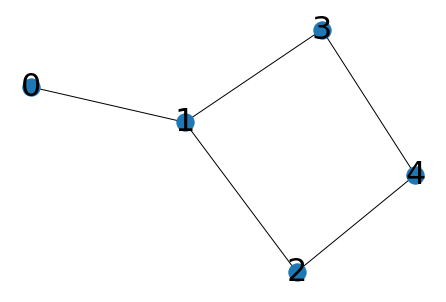

In [2]:
G = nx.Graph()
G.add_weighted_edges_from([(0,1,1),(1,2,1),(1,3,1),(2,4,1),(3,4,1)])
nx.draw(G,node_size=300,width=1,with_labels=True,font_size=32)

Load Network from file:

number of nodes = 1572
number of edges =  17214


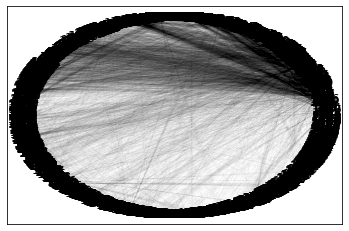

In [3]:
path = r"C:\Users\Adam Jones\Desktop\CSCI3352\Project\Data\USairport_2010_connected.txt" # The only 2 disconnected nodes (889 and 1155) were deleted from the origional text file
G = nx.read_weighted_edgelist(path)
n = G.number_of_nodes()
m = G.number_of_edges()
print("number of nodes =", n)
print("number of edges = ",m)
#nx.draw(G,node_size=200,width=1,with_labels=True,font_size=15)
nx.draw_networkx(G,node_size=0.1,width=0.01,pos=nx.circular_layout(G)) # draw it pretty
    

Define Simulation Function:

In [4]:
def simulate(G,beta,gamma,z):
    ztemp = copy.deepcopy(z)
    rownd = 0
    S = [len(z)-1]
    I = [1]
    R = [0]
    t = [0]
    maxWeight = 0
    print("z0 = ",z)
    #print("ztemp0 = ",ztemp)
    for edge in G.edges:
        if G[edge[0]][edge[1]]['weight'] == 0:
            print("null:",edge[0],edge[1])
        if G[edge[0]][edge[1]]['weight'] > maxWeight:
            maxWeight = G[edge[0]][edge[1]]['weight']
    print("maxWeight =",maxWeight)
    while 1 in z:
        rownd += 1
        print("Beginning of round",rownd)
        for edge in G.edges():
            weight = G[edge[0]][edge[1]]['weight']
            weightRatio = weight/maxWeight
            #print("edge = ",edge)
            #print("edge[0] =",edge[0])
            #print("edge[1] =",edge[1])
            #print("z[",edge[0],"] =",z[edge[0]])
            #print("z[",edge[1],"] =",z[edge[1]])
            #print("ztemp[",edge[0],"] =",ztemp[edge[0]])
            #print("ztemp[",edge[1],"] =",ztemp[edge[1]])
            #print(edge[0],"to",edge[1])
            #print("weightRatio =",weightRatio)
            #print("int(z[int(edge[0])]) =",int(z[int(edge[0])]))
            #print("int(z[int(edge[1])]) =",int(z[int(edge[1])]))
            if int(z[int(edge[0])]) == 1 and int(z[int(edge[1])]) == 0:
                if random.random() < beta*weightRatio:
                    ztemp[int(edge[1])] = 1
                    print("infection spread from node",edge[0],"to",edge[1])
                else:
                    print("infection did not spread from node",edge[0],"to",edge[1])
            if int(z[int(edge[1])]) == 1 and int(z[int(edge[0])]) == 0:
                if random.random() < beta*weightRatio:
                    ztemp[int(edge[0])] = 1
                    print("infection spread from node",edge[1],"to",edge[0])
                else:
                    print("infection did not spread from node",edge[1],"to",edge[0])
            #print("z after infections = ",z)
            #print("ztemp after infections = ",ztemp)
        for node in G:
            #print("Node = ",node)
            if z[int(node)] == 1:
                #print("node = ",node)
                if random.random() < gamma:
                    ztemp[int(node)] = 2
                    print("node",node,"recovered")
                else:
                    print("node",node,"did not recover")
        #print("z after recoveries = ",z)
        #print("ztemp after recoveries = ",ztemp)
        z = copy.deepcopy(ztemp)
        S.append(z.count(0))
        I.append(z.count(1))
        R.append(z.count(2))
        t.append(rownd)
        print("t =",rownd,"\nS =",z.count(0),"\nI =",z.count(1),"\nR =",z.count(2),"\n-------")
    if 1 not in z:
        print("Simulation is complete \nzFinal =",z,"\nS =",S,"\nI =",I,"\nR =",R,"\nt =",t)
        return S,I,R,t

Run Simulation:

In [5]:
print("len(G) =",len(G))
endEdge = 0
for edge in G.edges():
    if int(edge[0]) > endEdge:
        endEdge = int(edge[0])
    if int(edge[1]) > endEdge:
        endEdge = int(edge[1])
z = [0]*(endEdge+1)
OL = random.randint(0,len(G)-1)
z[OL] = int(1) 
beta = 20
gamma = 0.5
S,I,R,t = simulate(G,beta,gamma,z)


len(G) = 1572
z0 =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

infection did not spread from node 1517 to 685
infection did not spread from node 1613 to 685
infection did not spread from node 1700 to 685
infection did not spread from node 1820 to 685
infection did not spread from node 1837 to 685
infection did not spread from node 899 to 685
infection did not spread from node 918 to 685
infection did not spread from node 1072 to 685
infection did not spread from node 1176 to 685
infection did not spread from node 1255 to 685
infection did not spread from node 1264 to 685
infection did not spread from node 1426 to 685
infection did not spread from node 1462 to 685
infection did not spread from node 1645 to 685
infection did not spread from node 1822 to 1217
infection did not spread from node 114 to 505
infection did not spread from node 389 to 505
infection did not spread from node 543 to 505
infection did not spread from node 877 to 505
infection did not spread from node 1068 to 505
infection did not spread from node 1139 to 505
infection spread f

infection did not spread from node 1820 to 134
infection did not spread from node 1837 to 134
infection did not spread from node 246 to 134
infection did not spread from node 296 to 134
infection did not spread from node 300 to 134
infection did not spread from node 311 to 134
infection did not spread from node 356 to 134
infection did not spread from node 613 to 134
infection did not spread from node 716 to 134
infection did not spread from node 1022 to 134
infection did not spread from node 1252 to 134
infection did not spread from node 1359 to 134
infection did not spread from node 169 to 41
infection did not spread from node 169 to 60
infection did not spread from node 169 to 75
infection did not spread from node 169 to 127
infection did not spread from node 169 to 164
infection did not spread from node 169 to 126
infection did not spread from node 169 to 237
infection did not spread from node 169 to 239
infection did not spread from node 169 to 256
infection did not spread from no

infection spread from node 317 to 1101
infection spread from node 317 to 1109
infection spread from node 317 to 1161
infection spread from node 317 to 1250
infection spread from node 317 to 1251
infection did not spread from node 317 to 1270
infection did not spread from node 317 to 1280
infection did not spread from node 317 to 1297
infection did not spread from node 317 to 1308
infection spread from node 317 to 1316
infection spread from node 317 to 1320
infection did not spread from node 317 to 1328
infection spread from node 317 to 1374
infection did not spread from node 317 to 1376
infection did not spread from node 317 to 1390
infection spread from node 317 to 1406
infection did not spread from node 317 to 1414
infection did not spread from node 317 to 1463
infection spread from node 317 to 1504
infection did not spread from node 317 to 1522
infection did not spread from node 317 to 1523
infection spread from node 317 to 1543
infection spread from node 317 to 1549
infection sprea

infection did not spread from node 526 to 1664
infection did not spread from node 526 to 1783
infection did not spread from node 526 to 1799
infection did not spread from node 526 to 1803
infection did not spread from node 526 to 1806
infection did not spread from node 526 to 1848
infection did not spread from node 526 to 576
infection did not spread from node 526 to 642
infection did not spread from node 526 to 686
infection did not spread from node 526 to 713
infection did not spread from node 526 to 791
infection did not spread from node 526 to 1149
infection did not spread from node 526 to 1156
infection did not spread from node 526 to 1293
infection did not spread from node 526 to 1339
infection did not spread from node 526 to 1671
infection did not spread from node 526 to 1782
infection did not spread from node 145 to 534
infection did not spread from node 356 to 534
infection did not spread from node 234 to 534
infection did not spread from node 240 to 534
infection did not spre

infection did not spread from node 716 to 1631
infection did not spread from node 716 to 1664
infection did not spread from node 716 to 749
infection did not spread from node 716 to 972
infection did not spread from node 716 to 989
infection did not spread from node 716 to 1011
infection did not spread from node 716 to 1027
infection did not spread from node 716 to 1043
infection did not spread from node 716 to 1127
infection did not spread from node 716 to 1256
infection did not spread from node 716 to 1258
infection did not spread from node 716 to 1328
infection did not spread from node 716 to 1435
infection did not spread from node 716 to 1611
infection did not spread from node 716 to 1617
infection did not spread from node 716 to 1823
infection did not spread from node 52 to 727
infection did not spread from node 145 to 727
infection did not spread from node 234 to 727
infection did not spread from node 246 to 727
infection did not spread from node 356 to 727
infection did not spre

infection did not spread from node 899 to 1043
infection did not spread from node 899 to 1066
infection did not spread from node 899 to 1101
infection did not spread from node 899 to 1166
infection did not spread from node 899 to 1246
infection did not spread from node 899 to 1258
infection did not spread from node 899 to 1320
infection did not spread from node 899 to 1328
infection did not spread from node 899 to 1406
infection did not spread from node 899 to 1423
infection did not spread from node 899 to 1435
infection did not spread from node 899 to 1488
infection did not spread from node 899 to 1504
infection did not spread from node 899 to 1549
infection did not spread from node 899 to 1567
infection did not spread from node 899 to 1596
infection did not spread from node 899 to 1629
infection did not spread from node 899 to 1631
infection did not spread from node 899 to 1664
infection did not spread from node 899 to 1698
infection did not spread from node 899 to 1785
infection did

infection did not spread from node 994 to 903
infection spread from node 994 to 970
infection did not spread from node 994 to 972
infection did not spread from node 994 to 988
infection did not spread from node 994 to 149
infection did not spread from node 994 to 179
infection did not spread from node 994 to 322
infection did not spread from node 994 to 331
infection did not spread from node 994 to 439
infection did not spread from node 994 to 588
infection did not spread from node 994 to 595
infection did not spread from node 994 to 718
infection did not spread from node 994 to 748
infection did not spread from node 994 to 940
infection did not spread from node 994 to 1011
infection did not spread from node 994 to 1029
infection spread from node 994 to 1033
infection spread from node 994 to 1043
infection did not spread from node 994 to 1061
infection did not spread from node 994 to 1065
infection did not spread from node 994 to 1066
infection did not spread from node 994 to 1101
infe

infection did not spread from node 1200 to 1807
infection spread from node 1200 to 1823
infection did not spread from node 1200 to 1826
infection did not spread from node 1200 to 1828
infection did not spread from node 1200 to 1836
infection did not spread from node 1200 to 1841
infection did not spread from node 1200 to 1843
infection spread from node 1200 to 1847
infection did not spread from node 1200 to 1602
infection did not spread from node 1200 to 1711
infection did not spread from node 321 to 1246
infection did not spread from node 613 to 1246
infection did not spread from node 618 to 1246
infection did not spread from node 1231 to 1246
infection did not spread from node 215 to 1246
infection spread from node 1645 to 1246
infection did not spread from node 1252 to 38
infection did not spread from node 1252 to 41
infection did not spread from node 1252 to 60
infection spread from node 1252 to 75
infection did not spread from node 1252 to 86
infection did not spread from node 125

infection did not spread from node 1517 to 1067
infection did not spread from node 1517 to 1091
infection did not spread from node 1517 to 1162
infection did not spread from node 1517 to 1250
infection did not spread from node 1517 to 1297
infection did not spread from node 1517 to 1316
infection spread from node 1517 to 1320
infection did not spread from node 1517 to 1328
infection did not spread from node 1517 to 1339
infection did not spread from node 1517 to 1406
infection did not spread from node 1517 to 1497
infection did not spread from node 1517 to 179
infection did not spread from node 1517 to 237
infection did not spread from node 1517 to 256
infection did not spread from node 1517 to 373
infection did not spread from node 1517 to 591
infection did not spread from node 1517 to 968
infection did not spread from node 1517 to 1021
infection did not spread from node 1517 to 1027
infection did not spread from node 1517 to 1047
infection did not spread from node 1517 to 1161
infect

infection did not spread from node 1470 to 881
infection spread from node 1470 to 903
infection did not spread from node 1470 to 914
infection did not spread from node 1470 to 956
infection spread from node 1470 to 1000
infection did not spread from node 1470 to 1008
infection did not spread from node 1470 to 1011
infection did not spread from node 1470 to 1047
infection did not spread from node 1470 to 1067
infection did not spread from node 1470 to 1082
infection spread from node 1470 to 1162
infection spread from node 1470 to 1259
infection spread from node 1470 to 1297
infection did not spread from node 1470 to 1320
infection did not spread from node 1470 to 1339
infection did not spread from node 1470 to 1352
infection did not spread from node 1470 to 1365
infection did not spread from node 1470 to 1408
infection did not spread from node 1470 to 1413
infection did not spread from node 1470 to 1442
infection did not spread from node 1470 to 40
infection did not spread from node 147

infection did not spread from node 215 to 1319
infection did not spread from node 215 to 1321
infection did not spread from node 215 to 1328
infection spread from node 215 to 1337
infection did not spread from node 215 to 1364
infection did not spread from node 215 to 1376
infection spread from node 215 to 1395
infection did not spread from node 215 to 1404
infection did not spread from node 215 to 1406
infection did not spread from node 215 to 1417
infection did not spread from node 215 to 1421
infection did not spread from node 215 to 1423
infection spread from node 215 to 1430
infection did not spread from node 215 to 1440
infection did not spread from node 215 to 1454
infection did not spread from node 215 to 1473
infection did not spread from node 215 to 1488
infection did not spread from node 215 to 1522
infection did not spread from node 215 to 1534
infection did not spread from node 215 to 1543
infection did not spread from node 215 to 1549
infection did not spread from node 21

infection did not spread from node 334 to 1678
infection did not spread from node 334 to 1682
infection did not spread from node 334 to 1828
infection did not spread from node 334 to 337
infection did not spread from node 334 to 595
infection did not spread from node 334 to 681
infection did not spread from node 334 to 757
infection did not spread from node 334 to 1061
infection did not spread from node 334 to 1067
infection did not spread from node 334 to 1162
infection did not spread from node 334 to 1297
infection did not spread from node 334 to 1411
infection did not spread from node 334 to 1484
infection did not spread from node 334 to 1773
infection did not spread from node 334 to 1799
infection did not spread from node 334 to 1834
infection did not spread from node 343 to 313
infection did not spread from node 343 to 379
infection did not spread from node 343 to 1011
infection did not spread from node 343 to 1162
infection did not spread from node 343 to 1320
infection did not s

infection spread from node 500 to 170
infection did not spread from node 500 to 179
infection did not spread from node 500 to 181
infection did not spread from node 500 to 209
infection spread from node 500 to 213
infection did not spread from node 500 to 214
infection did not spread from node 500 to 218
infection spread from node 500 to 225
infection spread from node 500 to 226
infection spread from node 500 to 237
infection did not spread from node 500 to 251
infection did not spread from node 500 to 262
infection did not spread from node 500 to 293
infection did not spread from node 500 to 307
infection spread from node 500 to 336
infection did not spread from node 500 to 354
infection did not spread from node 500 to 373
infection did not spread from node 500 to 375
infection spread from node 500 to 388
infection spread from node 500 to 436
infection spread from node 500 to 439
infection spread from node 500 to 456
infection did not spread from node 500 to 229
infection did not spre

infection did not spread from node 875 to 530
infection did not spread from node 875 to 532
infection did not spread from node 875 to 536
infection spread from node 875 to 548
infection did not spread from node 875 to 577
infection did not spread from node 875 to 579
infection spread from node 875 to 588
infection did not spread from node 875 to 597
infection spread from node 875 to 611
infection did not spread from node 875 to 631
infection did not spread from node 875 to 671
infection did not spread from node 875 to 721
infection did not spread from node 875 to 771
infection did not spread from node 875 to 813
infection did not spread from node 875 to 858
infection did not spread from node 875 to 872
infection did not spread from node 875 to 86
infection did not spread from node 875 to 144
infection did not spread from node 875 to 522
infection did not spread from node 875 to 575
infection did not spread from node 875 to 778
infection did not spread from node 875 to 828
infection spr

infection did not spread from node 1068 to 1573
infection did not spread from node 1068 to 1682
infection did not spread from node 1068 to 1799
infection did not spread from node 1068 to 1834
infection did not spread from node 1068 to 1847
infection did not spread from node 1072 to 39
infection did not spread from node 1072 to 41
infection did not spread from node 1072 to 149
infection did not spread from node 1072 to 204
infection did not spread from node 1072 to 232
infection did not spread from node 1072 to 256
infection did not spread from node 1072 to 361
infection did not spread from node 1072 to 481
infection did not spread from node 1072 to 512
infection did not spread from node 1072 to 560
infection did not spread from node 1072 to 594
infection did not spread from node 1072 to 693
infection did not spread from node 1072 to 735
infection did not spread from node 1072 to 812
infection did not spread from node 1072 to 890
infection did not spread from node 1072 to 908
infection 

infection did not spread from node 1255 to 1807
infection spread from node 1255 to 1821
infection did not spread from node 1255 to 1823
infection did not spread from node 1255 to 1826
infection did not spread from node 1255 to 1843
infection did not spread from node 1255 to 1844
infection did not spread from node 1255 to 1256
infection did not spread from node 1255 to 1297
infection did not spread from node 1255 to 1428
infection did not spread from node 1255 to 1519
infection did not spread from node 1255 to 1525
infection did not spread from node 1372 to 1297
infection did not spread from node 1405 to 1297
infection spread from node 1433 to 1297
infection did not spread from node 1437 to 1297
infection did not spread from node 1645 to 1297
infection did not spread from node 1304 to 40
infection did not spread from node 1304 to 156
infection did not spread from node 1304 to 179
infection did not spread from node 1304 to 196
infection did not spread from node 1304 to 251
infection did 

infection did not spread from node 1437 to 750
infection spread from node 1437 to 813
infection spread from node 1437 to 828
infection did not spread from node 1437 to 858
infection did not spread from node 1437 to 882
infection did not spread from node 1437 to 908
infection spread from node 1437 to 911
infection did not spread from node 1437 to 914
infection did not spread from node 1437 to 925
infection did not spread from node 1437 to 944
infection spread from node 1437 to 1000
infection did not spread from node 1437 to 1035
infection spread from node 1437 to 1038
infection spread from node 1437 to 1044
infection did not spread from node 1437 to 1067
infection spread from node 1437 to 1082
infection did not spread from node 1437 to 1094
infection did not spread from node 1437 to 1106
infection did not spread from node 1437 to 1214
infection spread from node 1437 to 1243
infection did not spread from node 1437 to 1245
infection spread from node 1437 to 1321
infection did not spread f

infection did not spread from node 1016 to 1111
infection did not spread from node 1016 to 1136
infection did not spread from node 1016 to 1149
infection did not spread from node 1016 to 1208
infection spread from node 1016 to 1227
infection did not spread from node 1016 to 1242
infection did not spread from node 1016 to 1280
infection spread from node 1016 to 1281
infection did not spread from node 1016 to 1286
infection did not spread from node 1016 to 1293
infection did not spread from node 1016 to 1303
infection did not spread from node 1016 to 1308
infection did not spread from node 1016 to 1309
infection spread from node 1016 to 1316
infection did not spread from node 1016 to 1348
infection did not spread from node 1016 to 1355
infection did not spread from node 1016 to 1392
infection spread from node 1016 to 1404
infection spread from node 1016 to 1421
infection did not spread from node 1016 to 1424
infection spread from node 1016 to 1430
infection did not spread from node 1016 

infection did not spread from node 1372 to 509
infection did not spread from node 1352 to 509
infection did not spread from node 88 to 844
infection did not spread from node 88 to 20
infection did not spread from node 88 to 70
infection did not spread from node 587 to 70
infection did not spread from node 1433 to 70
infection did not spread from node 88 to 45
infection did not spread from node 88 to 65
infection did not spread from node 88 to 66
infection did not spread from node 88 to 71
infection did not spread from node 88 to 94
infection did not spread from node 88 to 116
infection did not spread from node 88 to 152
infection did not spread from node 88 to 156
infection did not spread from node 88 to 174
infection did not spread from node 88 to 231
infection did not spread from node 88 to 242
infection did not spread from node 88 to 264
infection did not spread from node 88 to 269
infection did not spread from node 88 to 372
infection spread from node 88 to 402
infection did not sp

infection did not spread from node 989 to 149
infection did not spread from node 989 to 203
infection did not spread from node 989 to 532
infection did not spread from node 989 to 630
infection did not spread from node 989 to 651
infection did not spread from node 989 to 692
infection did not spread from node 989 to 702
infection did not spread from node 989 to 947
infection did not spread from node 989 to 1021
infection did not spread from node 989 to 1214
infection did not spread from node 989 to 1308
infection did not spread from node 989 to 1474
infection did not spread from node 989 to 1525
infection did not spread from node 989 to 1573
infection did not spread from node 989 to 1776
infection did not spread from node 989 to 1780
infection did not spread from node 989 to 1785
infection did not spread from node 989 to 1826
infection did not spread from node 989 to 1682
infection did not spread from node 994 to 39
infection did not spread from node 994 to 158
infection did not spread

infection did not spread from node 711 to 1594
infection did not spread from node 711 to 1681
infection did not spread from node 711 to 1686
infection did not spread from node 711 to 1704
infection did not spread from node 711 to 1843
infection spread from node 711 to 1844
infection did not spread from node 711 to 1021
infection did not spread from node 711 to 1141
infection did not spread from node 711 to 1159
infection did not spread from node 718 to 133
infection did not spread from node 749 to 1008
infection did not spread from node 749 to 1709
infection did not spread from node 1433 to 757
infection did not spread from node 258 to 874
infection did not spread from node 428 to 874
infection did not spread from node 1403 to 874
infection did not spread from node 1611 to 874
infection did not spread from node 1738 to 874
infection did not spread from node 1068 to 874
infection did not spread from node 1437 to 874
infection did not spread from node 875 to 49
infection did not spread f

infection did not spread from node 41 to 272
infection did not spread from node 41 to 635
infection did not spread from node 41 to 748
infection did not spread from node 41 to 780
infection did not spread from node 41 to 947
infection did not spread from node 41 to 1202
infection did not spread from node 41 to 1368
infection did not spread from node 41 to 1698
infection did not spread from node 41 to 1785
infection did not spread from node 41 to 149
infection did not spread from node 41 to 1497
infection did not spread from node 41 to 1780
infection did not spread from node 60 to 217
infection did not spread from node 60 to 947
infection did not spread from node 218 to 1686
infection did not spread from node 256 to 565
infection did not spread from node 256 to 623
infection did not spread from node 256 to 655
infection did not spread from node 256 to 1257
infection did not spread from node 256 to 1386
infection did not spread from node 256 to 1567
infection did not spread from node 256

infection did not spread from node 1834 to 1347
infection did not spread from node 1834 to 563
infection did not spread from node 1834 to 802
infection did not spread from node 1834 to 921
infection did not spread from node 1834 to 1741
infection did not spread from node 1834 to 1182
infection did not spread from node 163 to 739
infection did not spread from node 1230 to 710
infection did not spread from node 801 to 1302
infection did not spread from node 1738 to 957
infection did not spread from node 337 to 1365
infection did not spread from node 752 to 243
infection did not spread from node 956 to 232
infection did not spread from node 956 to 907
infection did not spread from node 1524 to 1324
infection did not spread from node 801 to 764
infection did not spread from node 474 to 1191
infection did not spread from node 474 to 1360
infection did not spread from node 322 to 460
infection did not spread from node 322 to 890
infection did not spread from node 628 to 286
infection did not

infection did not spread from node 685 to 1021
infection did not spread from node 685 to 1041
infection did not spread from node 685 to 1060
infection did not spread from node 685 to 1134
infection did not spread from node 685 to 1153
infection did not spread from node 685 to 1154
infection did not spread from node 685 to 1173
infection did not spread from node 685 to 1191
infection did not spread from node 685 to 1204
infection did not spread from node 685 to 1221
infection did not spread from node 685 to 1269
infection did not spread from node 685 to 1289
infection did not spread from node 685 to 1299
infection did not spread from node 685 to 1319
infection did not spread from node 685 to 1326
infection did not spread from node 685 to 1330
infection did not spread from node 685 to 1336
infection did not spread from node 685 to 1338
infection did not spread from node 685 to 1341
infection did not spread from node 685 to 1364
infection did not spread from node 685 to 1377
infection did

infection did not spread from node 41 to 1463
infection did not spread from node 258 to 1463
infection did not spread from node 383 to 1463
infection did not spread from node 1320 to 1463
infection did not spread from node 1549 to 1463
infection did not spread from node 1523 to 1463
infection did not spread from node 1504 to 1074
infection did not spread from node 1664 to 39
infection did not spread from node 1664 to 216
infection did not spread from node 1664 to 272
infection did not spread from node 1664 to 307
infection did not spread from node 1664 to 590
infection did not spread from node 1664 to 635
infection did not spread from node 1664 to 748
infection did not spread from node 1664 to 1356
infection did not spread from node 1664 to 1368
infection did not spread from node 1664 to 1497
infection did not spread from node 1664 to 1527
infection did not spread from node 478 to 156
infection did not spread from node 478 to 327
infection did not spread from node 478 to 536
infection 

infection did not spread from node 1350 to 1400
infection did not spread from node 41 to 238
infection did not spread from node 41 to 272
infection did not spread from node 41 to 635
infection did not spread from node 41 to 748
infection did not spread from node 41 to 780
infection did not spread from node 41 to 947
infection did not spread from node 41 to 1202
infection did not spread from node 41 to 1368
infection did not spread from node 41 to 1698
infection did not spread from node 41 to 1785
infection did not spread from node 41 to 149
infection did not spread from node 41 to 1497
infection did not spread from node 41 to 1780
infection did not spread from node 218 to 1686
infection did not spread from node 256 to 565
infection did not spread from node 256 to 1257
infection did not spread from node 256 to 1386
infection did not spread from node 256 to 1567
infection did not spread from node 256 to 1641
infection did not spread from node 258 to 149
infection did not spread from node

node 1317 recovered
node 1379 recovered
node 768 recovered
node 928 did not recover
node 1024 did not recover
node 891 did not recover
node 1689 did not recover
node 1706 recovered
node 869 recovered
node 1031 recovered
node 1844 did not recover
node 791 did not recover
node 993 did not recover
node 873 recovered
node 975 did not recover
t = 4 
S = 1376 
I = 119 
R = 364 
-------
Beginning of round 5
infection did not spread from node 47 to 1
infection did not spread from node 47 to 6
infection did not spread from node 47 to 15
infection did not spread from node 47 to 14
infection did not spread from node 47 to 68
infection did not spread from node 47 to 70
infection did not spread from node 47 to 81
infection did not spread from node 47 to 97
infection did not spread from node 47 to 99
infection did not spread from node 47 to 153
infection did not spread from node 47 to 392
infection did not spread from node 47 to 410
infection did not spread from node 47 to 440
infection did not spre

infection did not spread from node 1822 to 156
infection did not spread from node 1822 to 332
infection did not spread from node 1822 to 443
infection did not spread from node 1822 to 463
infection did not spread from node 1822 to 545
infection did not spread from node 1822 to 1214
infection did not spread from node 1822 to 1573
infection did not spread from node 1822 to 1635
infection did not spread from node 1822 to 1698
infection did not spread from node 1822 to 802
infection did not spread from node 1822 to 921
infection did not spread from node 1822 to 1525
infection did not spread from node 35 to 598
infection did not spread from node 1803 to 545
infection did not spread from node 1826 to 545
infection did not spread from node 710 to 702
infection did not spread from node 1847 to 1037
infection did not spread from node 41 to 1221
infection did not spread from node 503 to 1573
infection did not spread from node 710 to 1573
infection did not spread from node 891 to 1573
infection d

infection did not spread from node 1217 to 1720
infection did not spread from node 1217 to 1729
infection did not spread from node 1217 to 1732
infection did not spread from node 1217 to 1742
infection did not spread from node 1217 to 1354
infection did not spread from node 1217 to 1528
infection did not spread from node 1217 to 1536
infection did not spread from node 1186 to 1729
infection did not spread from node 152 to 91
infection did not spread from node 816 to 91
infection did not spread from node 1186 to 227
infection did not spread from node 152 to 844
infection did not spread from node 816 to 844
infection did not spread from node 1186 to 844
infection did not spread from node 152 to 70
infection did not spread from node 816 to 70
infection did not spread from node 820 to 70
infection did not spread from node 152 to 464
infection did not spread from node 816 to 1131
infection did not spread from node 1186 to 1416
infection did not spread from node 506 to 78
infection did not s

node 673 recovered
node 672 recovered
node 671 recovered
node 1024 did not recover
node 1844 did not recover
node 791 did not recover
node 993 did not recover
node 975 recovered
t = 6 
S = 1371 
I = 29 
R = 459 
-------
Beginning of round 7
infection did not spread from node 1186 to 1729
infection did not spread from node 1254 to 1729
infection did not spread from node 816 to 91
infection did not spread from node 1186 to 227
infection did not spread from node 1254 to 227
infection did not spread from node 816 to 844
infection did not spread from node 1186 to 844
infection did not spread from node 1677 to 844
infection did not spread from node 816 to 70
infection did not spread from node 816 to 1131
infection did not spread from node 1186 to 1416
infection did not spread from node 506 to 78
infection did not spread from node 1403 to 173
infection did not spread from node 300 to 49
infection did not spread from node 300 to 203
infection did not spread from node 300 to 371
infection did n

t = 8 
S = 1371 
I = 8 
R = 480 
-------
Beginning of round 9
infection did not spread from node 1254 to 1729
infection did not spread from node 1254 to 227
infection did not spread from node 1403 to 173
infection did not spread from node 300 to 49
infection did not spread from node 300 to 203
infection did not spread from node 300 to 371
infection did not spread from node 300 to 735
infection did not spread from node 300 to 870
infection did not spread from node 300 to 890
infection did not spread from node 300 to 1019
infection did not spread from node 300 to 1641
infection did not spread from node 300 to 1785
infection did not spread from node 1403 to 1313
infection did not spread from node 1254 to 31
infection did not spread from node 1254 to 185
infection did not spread from node 1254 to 1165
infection did not spread from node 1254 to 1207
infection did not spread from node 1254 to 1349
infection did not spread from node 1254 to 1446
infection did not spread from node 1254 to 1742

Visualize Simulation:

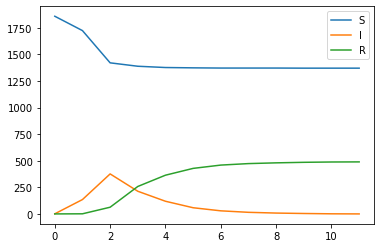

In [6]:
legend = ["S","I","R"]
plt.plot(t,S,label=legend[0])
plt.plot(t,I,label=legend[1])
plt.plot(t,R,label=legend[2])
plt.legend()
plt.show()

Effect of beta

In [7]:
print("len(G) =",len(G))
endEdge, Smax, Imax, Rmax = 0,0,0,0
for edge in G.edges():
    if int(edge[0]) > endEdge:
        endEdge = int(edge[0])
    if int(edge[1]) > endEdge:
        endEdge = int(edge[1])
z = [0]*(endEdge+1)
OL = rnd.randint(0,len(G)-1)
z[OL] = int(1) 
gamma = 0.2
S,I,R,t = []
for beta in range(0,10):
    b[beta] = beta
    S[beta],I[beta],R[beta],t[beta] = simulate(G,beta,gamma,z)
print("S[",beta,"] =",S[beta])
for i in range(0,len(S)):
    x[i] = i
    for j in S[i]:
        if j > Smax[i]:
            Smax[i] = j
    for j in I[i]:
        if j > Imax[i]:
            Imax[i] = j
    for j in R[i]:
        if j > Rmax[i]:
            Rmax[i] = j    
    tMax[i] = len(t[i])


len(G) = 1572


NameError: name 'rnd' is not defined

Visualize effect of beta on S,I,R and t

In [ ]:
legend = ["Smax","Imax","Rmax"]
plt.plot(beta,Smax,label=legend[0])
plt.plot(beta,Imax,label=legend[1])
plt.plot(beta,Rmax,label=legend[2])
plt.legend()
plt.show()